### 1: How Challenges Work

At Dataquest, we're huge believers in learning through doing and we hope this shows in the learning experience of the missions. While missions focus on introducing concepts, challenges allow you to perform deliberate practice by completing structured problems. You can read more about deliberate practice here and here. Challenges will feel similar to missions but with little instructional material and a larger focus on exercises.

If you have questions or run into issues, head over to the Dataquest forums or our Slack community.

### 2: Life And Death Of Avengers

The Avengers are a well-known and widely loved team of superheroes in the Marvel universe that were introduced in the 1960's in the original comic book series. They've since become popularized again through the recent Disney movies as part of the new Marvel Cinematic Universe.

The team at FiveThirtyEight wanted to dissect the deaths of the Avengers in the comics over the years. The writers were known to kill off and revive many of the superheroes so they were curious to know what data they could grab from the Marvel Wikia site, a fan-driven community site, to explore further. To learn how they collected their data, which is available on their Github repo, read the writeup they published on their site.

### 3: Exploring The Data

While the FiveThirtyEight team has done a wonderful job acquiring this data, the data still has some inconsistencies. Your mission, if you choose to accept it, is to clean up their dataset so it can be more useful for analysis in Pandas. Let's read our dataset into Pandas as a DataFrame and preview the first 5 rows to get a better sense of our data.

In [15]:
# imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import seaborn as sns
from mpl_toolkits.basemap import Basemap
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
avengers = pd.read_csv("data/avengers.csv")
avengers.head(3)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."


### 4: Filter Out The Bad Years

Since the data was collected from a community site, where most of the contributions came from individual users, there's room for errors to surface in the dataset. If you plot a histogram of the values in the Year column, which describes the year each Avenger was introduced, you'll immediately notice some oddities. There are quite a few Avengers who look like they were introduced in 1900, which we know is a little fishy. The Avengers weren't introduced in the comic series until the 1960's!

This is obviously a mistake in the data and you should remove all Avengers before 1960 from the DataFrame.

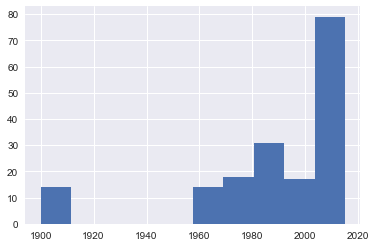

In [13]:
avengers["Year"].hist()

In [17]:
true_avengers = avengers[avengers["Year"]>=1960]
avengers.shape
true_avengers.shape

(173, 21)

(159, 21)

### 5: Consolidating Deaths

We are interested in the number of total deaths each character experienced and we'd like a field containing that distilled information. Right now, there are 5 fields (Death1 to Death5) that each contain a binary value representing if a superhero experienced that death or not. For example, a superhero can experience Death1, then Death2, etc. until they were no longer brought back to life by the writers.

We'd like to coalesce that information into just one field so we can do numerical analysis more easily.

In [40]:
# sum deaths and return count
def clean_deaths(row):
    num_deaths = 0
    cols = ['Death1','Death2','Death3','Death4','Death5']
    for c in cols:
        death = row[c]
        if pd.isnull(death) or death == 'NO':
            continue
        elif death == 'YES':
            num_deaths += 1
    return num_deaths    

# axis 1 or ‘columns’: apply function to each row
true_avengers["Deaths"] = true_avengers.apply(clean_deaths, axis=1) 

# display by row and column numbers
true_avengers.iloc[:5,len(true_avengers.columns)-8:]

,Death3,Return3,Death4,Return4,Death5,Return5,Notes,Deaths
0,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...,1
1,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...,1
2,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm...",1
3,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ...",1
4,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...,2


### 6: Years Since Joining

For the final task, we want to know if the Years since joining field accurately reflects the Year column. If an Avenger was introduced in Year 1960, is the Years since joining value for that Avenger 55?

In [50]:
# reference year 2015
true_avengers.shape
correct_joined_years = (2015 - true_avengers["Year"]) == true_avengers["Years since joining"]
joined_accuracy_count = len(correct_joined_years)
joined_accuracy_count

(159, 22)

159